In [1]:
import openturns as ot
import numpy as np

In [2]:
def rastriginPy(X):
    A = 10.0
    delta = [(x**2 - A * np.cos(2 * np.pi * x)) for x in X]
    y = A + sum(delta)
    return [y]

In [3]:
rastriginPy([1.0, 1.0])

[-8.0]

In [4]:
dim = 2

In [5]:
rastrigin = ot.PythonFunction(dim, 1, rastriginPy)

In [6]:
lowerbound = [-5.12] * dim
upperbound = [5.12] * dim
bounds = ot.Interval(lowerbound, upperbound)

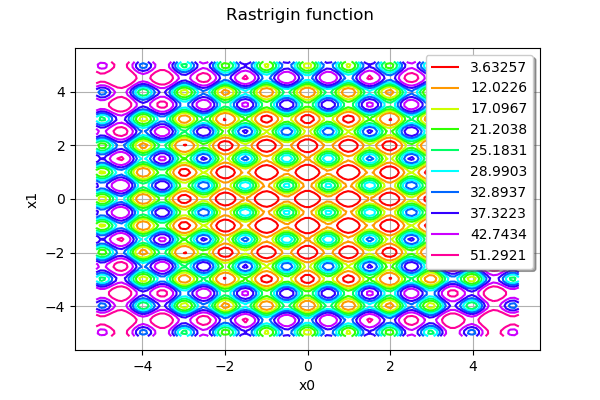

In [8]:
graph = rastrigin.draw(lowerbound, upperbound, [100]*dim)
graph.setTitle("Rastrigin function")
graph

In [9]:
problem = ot.OptimizationProblem(rastrigin)
problem.setBounds(bounds)

In [10]:
solver = ot.TNC(problem)

In [11]:
U = ot.Uniform(-5.12, 5.12)
distribution = ot.ComposedDistribution([U]*dim)

In [12]:
size = 100
startingPoints = distribution.getSample(size)

In [13]:
algo = ot.MultiStart(solver, startingPoints)
algo.run()
result = algo.getResult()

In [14]:
xoptim = result.getOptimalPoint()
xoptim

class=Point name=Unnamed dimension=2 values=[-2.40017e-13,4.84564e-10]

In [15]:
result.getEvaluationNumber()

17

In [16]:
inputSample = result.getInputSample()

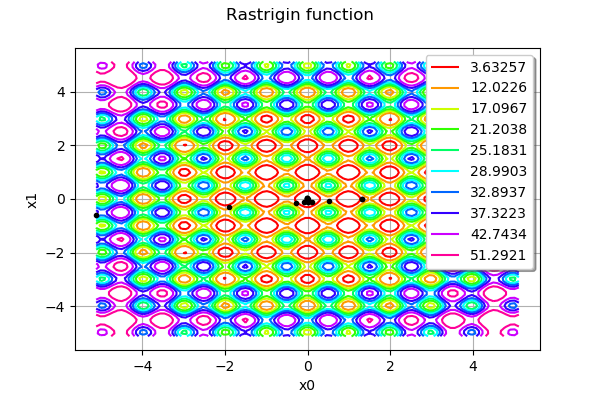

In [17]:
graph = rastrigin.draw(lowerbound, upperbound, [100]*dim)
graph.setTitle("Rastrigin function")
cloud = ot.Cloud(inputSample)
cloud.setPointStyle("bullet")
cloud.setColor("black")
graph.add(cloud)
graph

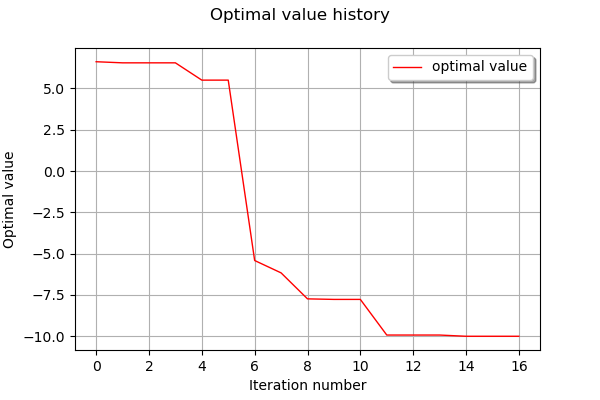

In [17]:
result.drawOptimalValueHistory()